# Custom directory name

When we drive a system, a directory with the same name as the system is created at the same level as the notebook and all simulation files are saved in it. Sometimes we want to change the path of that directory in order to keep our files organised. We can do that by passing `dirname` argument to the `drive` method.

As a simple example, let us simulate a one-dimensional array of spins.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-30e-9, 0, 0), p2=(30e-9, 3e-9, 3e-9))
cell = (3e-9, 3e-9, 3e-9)
mesh = df.Mesh(region=region, cell=cell)

system = mm.System(name='my_simulation')
system.energy = mm.Zeeman(H=(0, 0, 1e6))
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=1e6)

Now, we can pass `dirname` to the `drive` method to instruct Ubermag where to place `my_simulation` directory. Let us say we want to place it in `my_project`:

In [2]:
md = mc.MinDriver()
md.drive(system, dirname='./my_project')

Running OOMMF (ExeOOMMFRunner)[2022/02/18 18:12]... (0.5 s)


If we inspect the files, we can see that our simulation results are saved in `my_project/my_simulation/drive-0`:

In [3]:
import os
dirname = os.path.join('my_project', 'my_simulation', 'drive-0')
os.path.isdir(dirname)

True

All properties of the system can be accessed as usual - changing the directory happens in the background:

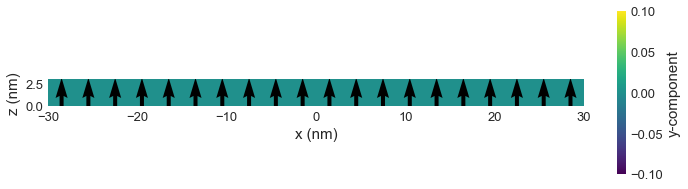

In [4]:
system.m.plane('y').mpl(figsize=(12, 3))

In [5]:
system.table.data

,max_mxHxm,E,delta_E,bracket_count,line_min_count,conjugate_cycle_count,cycle_count,cycle_sub_count,energy_calc_count,E_zeeman,iteration,stage_iteration,stage,mx,my,mz
0,1.503365e-10,-6.785840e-19,-1.350143e-21,13.0,0.0,9.0,9.0,0.0,14.0,-6.785840e-19,13.0,13.0,0.0,1.503365e-16,0.0,1.0
